In [1]:
import numpy as np
import sys
sys.path.append('../../functions/')
from statistics_functions import *
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = '/work/bk1377/a270230/'
path_stat = path + 'statistics/'
path_imgs = path + 'imgs/'

LKFs = np.load(path_stat + f'LKFs_4km_all.npy', allow_pickle=True)[0]

In [3]:
def get_av_sd(var, years):
    arr = np.array([LKFs[year][var] for year in years])
    av = np.nanmean(arr, axis=0)
    sd = np.nanstd(arr, axis=0)
    return av, sd

In [4]:
def plot(var, years_lower, years_upper):
    years = [str(i) for i in range(years_lower,years_upper+1)]
    
    fig, ax = plt.subplots(figsize=(10,3))
    
    av, sd = get_av_sd(var, years)

    av = np.roll(av,31)
    sd = np.roll(sd,31)
    
    ax.plot(av)
    ax.fill_between(np.arange(len(av)), av+sd, av-sd, alpha=0.5)
    
    ax.set_xticks(xticks, [])
    ax.set_xticks(xticks_minor, np.roll(xticks_labels,1), minor=True)
    ax.set_xlim([0,365])
    ax.set_ylabel(f'{var} of LKFs')
    ax.grid()
    fig.tight_layout()

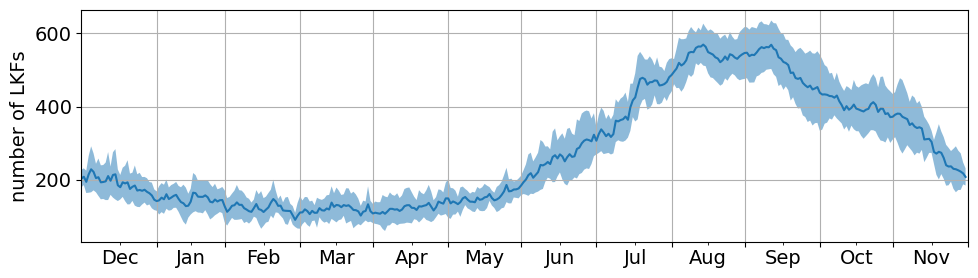

In [5]:
plot('number', 2000, 2010)

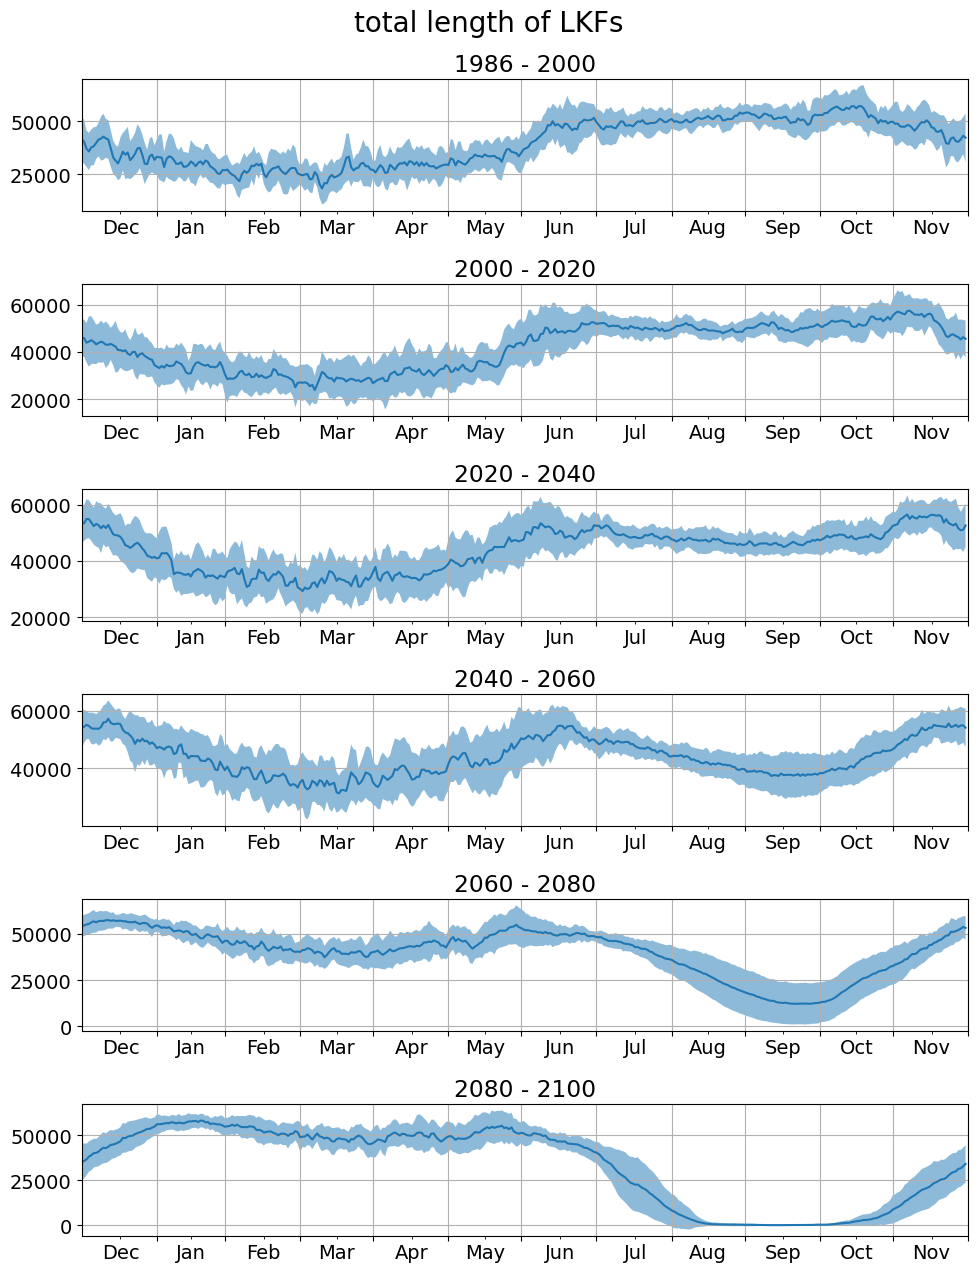

In [6]:
fig, axs = plt.subplots(6,1, figsize=(10,13))

var = 'total length'

step = 20
startyears = [1986] + [i for i in range(2000, 2101, step)]

for i, ax in enumerate(axs):
    years = [str(i) for i in range(startyears[i],startyears[i+1])]
    av, sd = get_av_sd(var, years)

    av = np.roll(av,31)
    sd = np.roll(sd,31)
    
    ax.plot(av)
    ax.fill_between(np.arange(len(av)), av+sd, av-sd, alpha=0.5)

    ax.set_title(f'{startyears[i]} - {startyears[i+1]}')
    ax.set_xticks(xticks, [])
    ax.set_xticks(xticks_minor, np.roll(xticks_labels,1), minor=True)
    ax.set_xlim([0,365])
    #ax.set_ylim([0,800])
    ax.grid()

fig.suptitle(f'{var} of LKFs', fontsize=20)
fig.tight_layout()

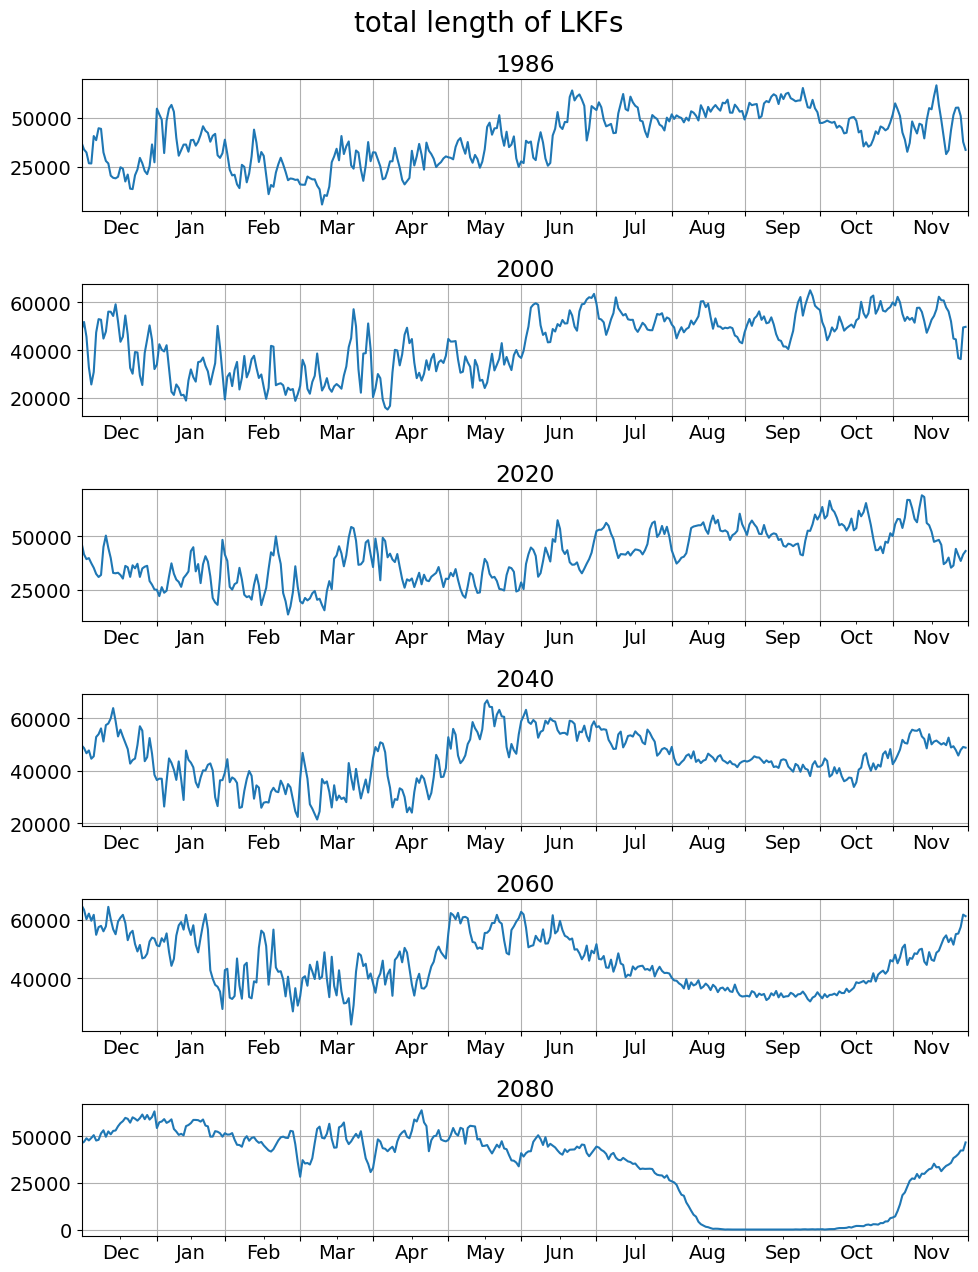

In [7]:
fig, axs = plt.subplots(6,1, figsize=(10,13))

step = 20
startyears = [1986] + [i for i in range(2000, 2101, step)]

for i, ax in enumerate(axs):
    years = [str(i) for i in (startyears[i],startyears[i])]
    av, sd = get_av_sd(var, years)

    av = np.roll(av,31)
    sd = np.roll(sd,31)
    
    ax.plot(av)
    ax.fill_between(np.arange(len(av)), av+sd, av-sd, alpha=0.5)

    ax.set_title(f'{startyears[i]}')
    ax.set_xticks(xticks, [])
    ax.set_xticks(xticks_minor, np.roll(xticks_labels,1), minor=True)
    ax.set_xlim([0,365])
    #ax.set_ylim([0,800])
    ax.grid()

fig.suptitle(f'{var} of LKFs', fontsize=20)
fig.tight_layout()

In [42]:
def plot2(var, ylims=[0,None], scale='linear', cut=False):
    periods = [[2010, 2020], [2050,2060], [2090, 2100]]
    
    fig, ax = plt.subplots(figsize=(10,3))
    
    for period in periods:
        years = [str(i) for i in range(period[0],period[1]+1)]
        av, sd = get_av_sd(var, years)

        if cut and period[0]==2090:
            # cut out August - October (takes into account exclusive indexing)
            av[xticks[6]:xticks[9]] = np.nan
            sd[xticks[6]:xticks[9]] = np.nan
        av = np.roll(av,31)
        sd = np.roll(sd,31)

    
        ax.plot(av, label=f'{period[0]} - {period[1]}')
        ax.fill_between(np.arange(len(av)), av+sd, av-sd, alpha=0.5)
    
    ax.set_title(var)
    ax.legend(loc='center left', bbox_to_anchor=(1,0.5))
    ax.set_xticks(xticks, [])
    ax.set_xticks(xticks_minor, np.roll(xticks_labels,1), minor=True)
    ax.set_xlim([0,365])
    ax.set_yscale(scale)
    ax.set_ylim(ylims)
    ax.grid()

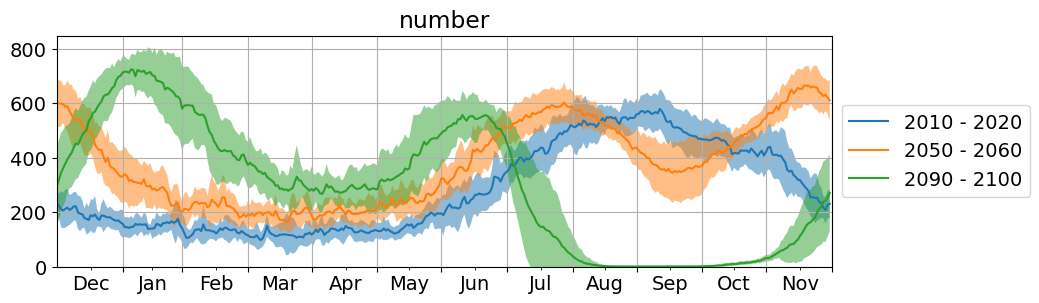

In [43]:
plot2('number')

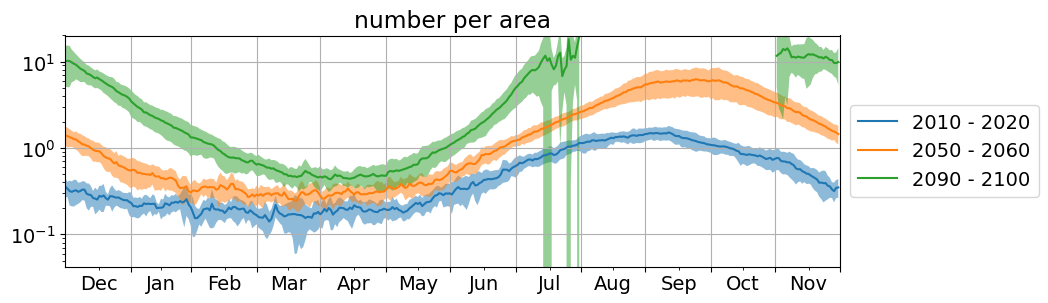

In [30]:
plot2('number per area', ylims=[None,20], scale='log', cut=True)

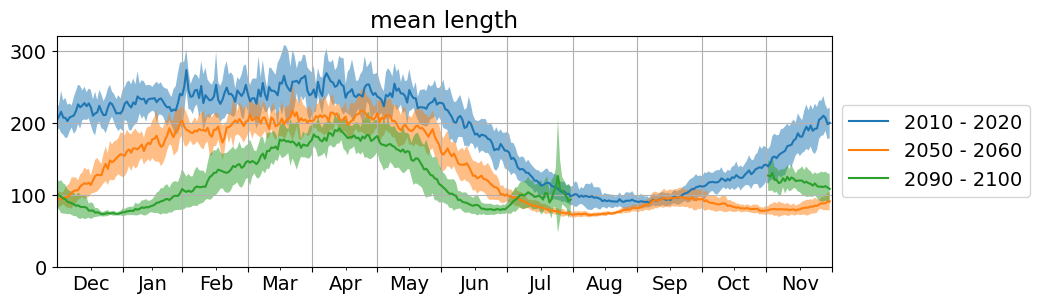

In [31]:
plot2('mean length', cut=True)

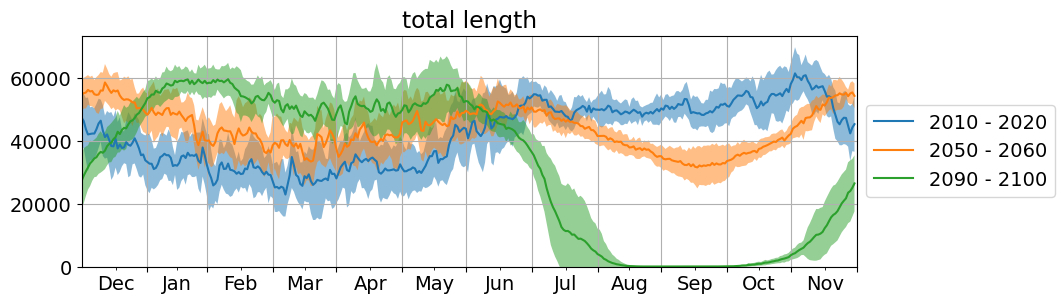

In [32]:
plot2('total length')

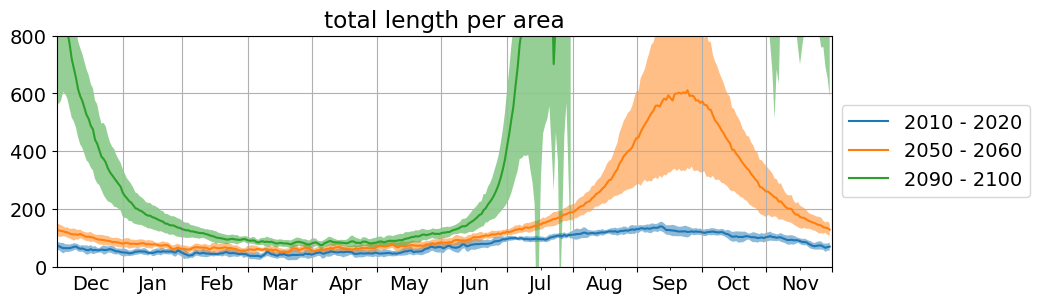

In [36]:
plot2('total length per area', ylims=[0,800], cut=True)

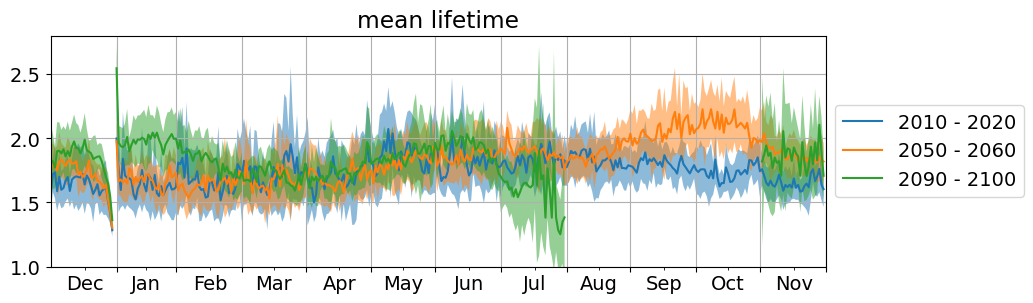

In [38]:
plot2('mean lifetime', ylims=[1,2.8], cut=True)

KeyError: 'mean curvature'

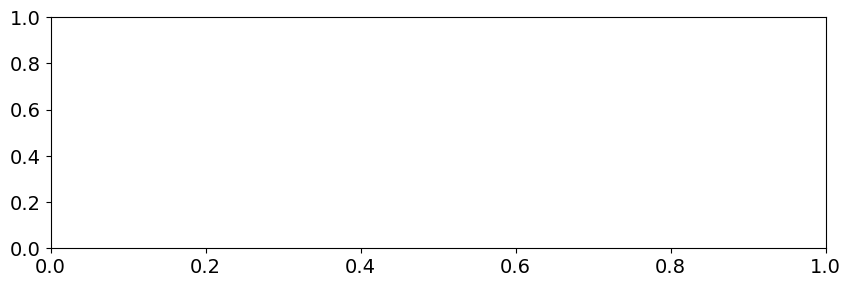

In [39]:
plot2('mean curvature', ylims=[0.06,0.11])